In [3]:
!ls ../dataset/toto


4D.zip      5D.zip      6D.zip      Toto650.zip Toto655.zip Toto658.zip


In [39]:
import numpy as np
import pandas as pd
import datetime
import calendar

#pd.read_csv?

df_4d = pd.read_csv('../dataset/toto/4D.zip', dtype=str)

#df_4d['DrawDate_Formatted'] = pd.to_datetime(df_4d['DrawDate'], format='%Y%m%d')
#df_4d.head()
#df_4d = df_4d.loc[df['DrawDate_Formatted'] >= '2018-01-01']
#df_4d.melt?

df_4d = df_4d.melt(id_vars=["DrawNo", "DrawDate"], var_name="PrizeType", value_name="No")
df_4d = df_4d.sort_values(["DrawNo", "DrawDate", "PrizeType"])
df_4d['DrawDateFormated'] = pd.to_datetime(df_4d['DrawDate'], format='%Y%m%d')


def set_prize_type(row):
    if row['PrizeType'] == '1stPrizeNo':
        return 1
    elif row['PrizeType'] == '2ndPrizeNo':
        return 2
    elif row['PrizeType'] == '3rdPrizeNo':
        return 3
    elif row['PrizeType'].startswith('Special'):
        return 4
    elif row['PrizeType'].startswith('Consolation'):
        return 5
    else:
        return 0

def get_week_day(row):
    return row['DrawDateFormated'].weekday()
    #return calendar.day_name[row['DrawDateFormated'].weekday()]
    
df_4d['PrizeTypeFormatted'] = df_4d.apply(set_prize_type, axis=1)
df_4d['DrawWeekDay'] = df_4d.apply(get_week_day, axis=1)

#df_4d = df_4d.set_index(['DrawNo', 'DrawDate'])

df_4d.head(10)
#df_4d.count

,DrawNo,DrawDate,PrizeType,No,DrawDateFormated,PrizeTypeFormatted,DrawWeekDay
0,040792,19920506,1stPrizeNo,0019,1992-05-06,1,2
4368,040792,19920506,2ndPrizeNo,1124,1992-05-06,2,2
8736,040792,19920506,3rdPrizeNo,0592,1992-05-06,3,2
56784,040792,19920506,ConsolationNo1,5311,1992-05-06,5,2
96096,040792,19920506,ConsolationNo10,0407,1992-05-06,5,2
61152,040792,19920506,ConsolationNo2,1949,1992-05-06,5,2
65520,040792,19920506,ConsolationNo3,1606,1992-05-06,5,2
69888,040792,19920506,ConsolationNo4,3775,1992-05-06,5,2
74256,040792,19920506,ConsolationNo5,6226,1992-05-06,5,2
78624,040792,19920506,ConsolationNo6,1271,1992-05-06,5,2


<IPython.core.display.Javascript object>


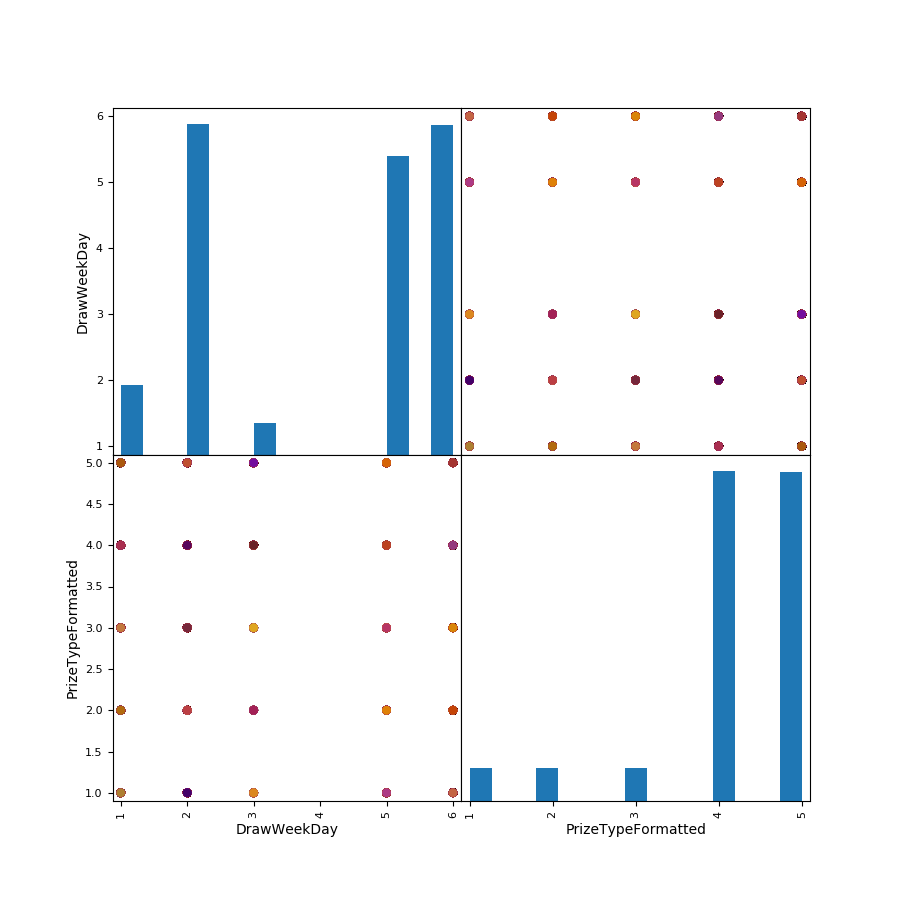

In [67]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from matplotlib import cm

X = df_4d[['DrawNo','DrawWeekDay', 'PrizeTypeFormatted']]
y = df_4d['No']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)


In [71]:
# K Nearest Neighbor
X = df_4d[['DrawWeekDay', 'PrizeTypeFormatted']]
y = df_4d['No']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn.score(X_test, y_test)

0.00019907628603280778

In [2]:
import pandas as pd

df_ticker = pd.read_csv('../dataset/ticker.csv', dtype=str)
#print(df_ticker.count())
df_ticker = df_ticker.loc[df_ticker['Exchange'] == 'KLS']
#print(df_ticker.count())
df_ticker.head()


,Ticker,Name,Exchange,Category Name,Country
892,6599.KL,Aeon Co. (M) Bhd,KLS,NaN,Malaysia
1524,5099.KL,AirAsia Berhad,KLS,NaN,Malaysia
1991,7579.KL,AWC Berhad,KLS,NaN,Malaysia
1992,7162.KL,Astino Berhad,KLS,NaN,Malaysia
1994,6432.KL,Apollo Food Holdings Berhad,KLS,NaN,Malaysia


In [151]:
from IPython.core.interactiveshell import InteractibveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
import numpy as np
df_kls_dividends = pd.read_csv('../dataset/kls_dividend_yields.csv')
df_kls_dividends.sort_values(['symbol', 'date'])
df_kls_dividends['year'] = pd.DatetimeIndex(df_kls_dividends['formatted_date']).year
df_kls_dividends.dtypes

symbol             object
date                int64
amount            float64
data              float64
formatted_date     object
type               object
year                int64
dtype: object

In [18]:
df_div_summary = df_kls_dividends.groupby(['symbol','year']).agg({'amount': np.sum})
df_div_summary = df_div_summary.reset_index()
df_div_summary.dtypes

symbol     object
year        int64
amount    float64
dtype: object

#### Equities with dividends in last 5 years - 2014 to 2018

In [29]:
#df_div_summary.columns.tolist()
import datetime as dt
now = dt.datetime.now()
current_year = now.year

# Past 5 years, not incluing current year
last_5_years = np.arange(current_year, current_year-5, -1)
print(last_5_years)

df_good_equities = df_div_summary.where(df_div_summary['year'].isin(last_5_years)).dropna()
df_good_equities.year = df_good_equities.year.astype(int)
df_good_equities

[2018 2017 2016 2015 2014]


,symbol,year,amount
0,0001.KL,2016,0.004000
1,0002.KL,2017,0.040000
2,0002.KL,2018,0.020000
5,0008.KL,2014,0.020000
6,0008.KL,2015,0.020000
7,0008.KL,2016,0.020000
8,0008.KL,2017,0.020000
11,0011.KL,2014,0.006300
12,0011.KL,2015,0.018900
13,0011.KL,2016,0.013600


#### Get the equities name

In [30]:
df_good_equities = pd.merge(df_good_equities, df_ticker, how='left', left_on='symbol', right_on='Ticker')
df_good_equities.head(10)

,symbol,year,amount,Ticker,Name,Exchange,Category Name,Country
0,0001.KL,2016,0.0040,0001.KL,SUPERCOMNET TECHNOLOGIES BHD,KLS,NaN,Malaysia
1,0002.KL,2017,0.0400,0002.KL,KOTRA INDUSTRIES BHD,KLS,NaN,Malaysia
2,0002.KL,2018,0.0200,0002.KL,KOTRA INDUSTRIES BHD,KLS,NaN,Malaysia
3,0008.KL,2014,0.0200,0008.KL,WILLOWGLEN MSC BHD,KLS,NaN,Malaysia
4,0008.KL,2015,0.0200,0008.KL,WILLOWGLEN MSC BHD,KLS,NaN,Malaysia
5,0008.KL,2016,0.0200,0008.KL,WILLOWGLEN MSC BHD,KLS,NaN,Malaysia
6,0008.KL,2017,0.0200,0008.KL,WILLOWGLEN MSC BHD,KLS,NaN,Malaysia
7,0011.KL,2014,0.0063,0011.KL,BRITE-TECH BHD,KLS,NaN,Malaysia
8,0011.KL,2015,0.0189,0011.KL,BRITE-TECH BHD,KLS,NaN,Malaysia
9,0011.KL,2016,0.0136,0011.KL,BRITE-TECH BHD,KLS,NaN,Malaysia


In [31]:
df_good_equities.drop(['Exchange', 'Category Name', 'Country', 'Ticker'], axis=1, inplace=True)
df_good_equities.head(10)

,symbol,year,amount,Name
0,0001.KL,2016,0.0040,SUPERCOMNET TECHNOLOGIES BHD
1,0002.KL,2017,0.0400,KOTRA INDUSTRIES BHD
2,0002.KL,2018,0.0200,KOTRA INDUSTRIES BHD
3,0008.KL,2014,0.0200,WILLOWGLEN MSC BHD
4,0008.KL,2015,0.0200,WILLOWGLEN MSC BHD
5,0008.KL,2016,0.0200,WILLOWGLEN MSC BHD
6,0008.KL,2017,0.0200,WILLOWGLEN MSC BHD
7,0011.KL,2014,0.0063,BRITE-TECH BHD
8,0011.KL,2015,0.0189,BRITE-TECH BHD
9,0011.KL,2016,0.0136,BRITE-TECH BHD


In [32]:
df_good_equities.rename(columns={'Name': 'name'}, inplace=True)
df_good_equities.head(10)

,symbol,year,amount,name
0,0001.KL,2016,0.0040,SUPERCOMNET TECHNOLOGIES BHD
1,0002.KL,2017,0.0400,KOTRA INDUSTRIES BHD
2,0002.KL,2018,0.0200,KOTRA INDUSTRIES BHD
3,0008.KL,2014,0.0200,WILLOWGLEN MSC BHD
4,0008.KL,2015,0.0200,WILLOWGLEN MSC BHD
5,0008.KL,2016,0.0200,WILLOWGLEN MSC BHD
6,0008.KL,2017,0.0200,WILLOWGLEN MSC BHD
7,0011.KL,2014,0.0063,BRITE-TECH BHD
8,0011.KL,2015,0.0189,BRITE-TECH BHD
9,0011.KL,2016,0.0136,BRITE-TECH BHD


In [71]:
df_good_equities = df_good_equities[['symbol', 'name', 'amount', 'year']]
df_good_equities.head(30)

,symbol,name,amount,year
0,0001.KL,SUPERCOMNET TECHNOLOGIES BHD,0.0040,2016
1,0002.KL,KOTRA INDUSTRIES BHD,0.0400,2017
2,0002.KL,KOTRA INDUSTRIES BHD,0.0200,2018
3,0008.KL,WILLOWGLEN MSC BHD,0.0200,2014
4,0008.KL,WILLOWGLEN MSC BHD,0.0200,2015
5,0008.KL,WILLOWGLEN MSC BHD,0.0200,2016
6,0008.KL,WILLOWGLEN MSC BHD,0.0200,2017
7,0011.KL,BRITE-TECH BHD,0.0063,2014
8,0011.KL,BRITE-TECH BHD,0.0189,2015
9,0011.KL,BRITE-TECH BHD,0.0136,2016


#### Equities with dividend yields in the last 5 years

In [34]:
len(df_good_equities.symbol.unique())

601

### With returns in last 3 years excluding current

In [73]:
last_3_years = np.arange(current_year, current_year-4, -1)
print(last_3_years)
df_shortlisted = df_good_equities.where(df_good_equities['year'].isin(last_3_years)).dropna()
df_shortlisted.year = df_shortlisted.year.astype(int)
group_by = df_shortlisted.groupby('symbol')
df_selected_equities = group_by.filter(lambda x: len(x) > 2) 
df_selected_equities.to_csv('../dataset/KLS_selected_equities.csv', encoding='utf-8', index=False, float_format='%g')
df_selected_equities

[2018 2017 2016 2015]


,symbol,name,amount,year
4,0008.KL,WILLOWGLEN MSC BHD,0.020000,2015
5,0008.KL,WILLOWGLEN MSC BHD,0.020000,2016
6,0008.KL,WILLOWGLEN MSC BHD,0.020000,2017
8,0011.KL,BRITE-TECH BHD,0.018900,2015
9,0011.KL,BRITE-TECH BHD,0.013600,2016
10,0011.KL,BRITE-TECH BHD,0.016000,2017
12,0012.KL,THREE-A RESOURCES BHD,0.014000,2015
13,0012.KL,THREE-A RESOURCES BHD,0.018000,2016
14,0012.KL,THREE-A RESOURCES BHD,0.018000,2017
15,0023.KL,IFCA MSC BHD,0.010000,2015


### Number of equities with yields from 2015 to 2018 (optional)

In [75]:
len(df_selected_equities.symbol.unique())

408

### Clustering on the selected equities

#### Get the current prices